Comparaison taille des classes SEGPA en REP/REP+/zone "normale"

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('lv-college.csv', sep = ';')

C:\Users\marie\AppData\Local\Temp\ipykernel_12132\1304432176.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lv-college.csv', sep = ';')


In [47]:
segpa_rep = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP', aggfunc = 'sum')

In [48]:
segpa_replus = df.pivot_table(values = "Nombre d'élèves total Segpa", index = 'REP +', aggfunc = 'sum')

In [51]:
rep = segpa_rep.loc[1, "Nombre d'élèves total Segpa"]
replus = segpa_replus.loc[1, "Nombre d'élèves total Segpa"]
clas = segpa_rep.loc[0, "Nombre d'élèves total Segpa"] + segpa_rep.loc[1, "Nombre d'élèves total Segpa"] - (rep+replus)

Text(0, 0.5, "Nombre d'élèves en SEGPA")

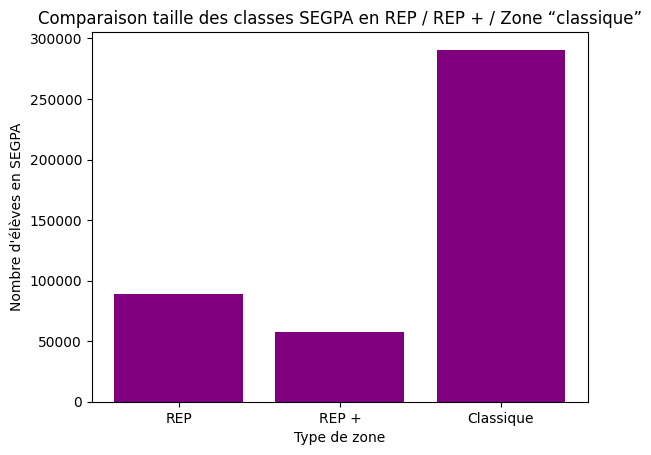

In [52]:
# Premier graphique

data = [rep, replus, clas]
label = ['REP', 'REP +', 'Classique']
plt.bar(label, data, color='purple')
plt.title("Comparaison taille des classes SEGPA en REP / REP + / Zone “classique”")
plt.xlabel("Type de zone")
plt.ylabel("Nombre d'élèves en SEGPA")

Text(0, 0.5, "Proportion d'élèves en SEGPA")

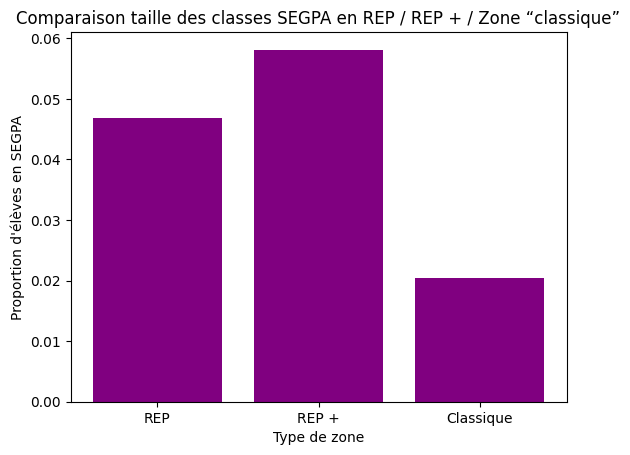

In [43]:
# Analyse : plutôt faire en proportion, plus pertinent car plus de zones "classiques" 
# donc forcément plus d'élèves en SEGPA dans ces zones-là.
# => div les nbs d'élv segpa par nb d'élv total

elv_rep = df.pivot_table(values = "Nombre d'élèves total", index = 'REP', aggfunc = 'sum')
elv_replus = df.pivot_table(values = "Nombre d'élèves total", index = 'REP +', aggfunc = 'sum')

elrep = elv_rep.loc[1, "Nombre d'élèves total"]
elreplus = elv_replus.loc[1, "Nombre d'élèves total"]
elclas = elv_rep.loc[0, "Nombre d'élèves total"] + elv_rep.loc[1, "Nombre d'élèves total"] - (elrep+elreplus)

data2 = [rep/elrep, replus/elreplus, clas/elclas]
plt.bar(label, data2, color='purple')
plt.title("Comparaison taille des classes SEGPA en REP / REP + / Zone “classique”")
plt.xlabel("Type de zone")
plt.ylabel("Proportion d'élèves en SEGPA")

In [ ]:
# On voit donc bien ici l'hypothèse que l'on avait faite au départ : en proportion, 
# il y a plus d'élèves en SEGPA dans les REP + que dans les REP que dans les zones "classiques".